In [1]:
import numpy as np
import matplotlib.pyplot as plt
from acf import acf
from scipy.optimize import curve_fit
from IsingClass import Ising

In [2]:
size = 1_000
n_sweeps = 100_000
beta = 1
J = 1.0
h = 0.0

ising = Ising(size, n_sweeps, beta, J, h)
ising.monte_carlo()

Monte Carlo finished


In [3]:
corr = acf(ising.magnetizations)

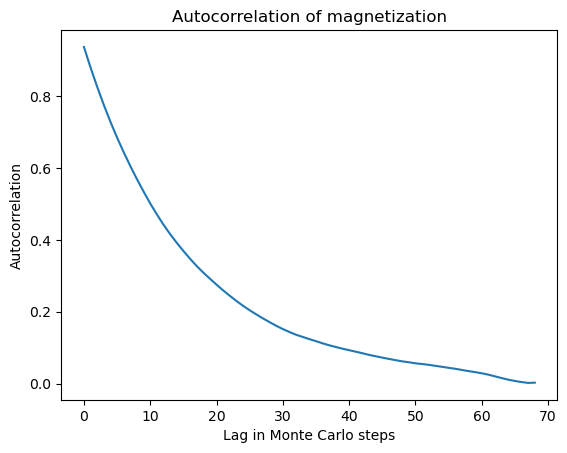

In [13]:

plt.plot(corr)
plt.xlabel("Lag in Monte Carlo steps")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of magnetization")
plt.savefig("plots/acf_mag.pdf")

In [5]:
def exponential_decay(x, tau, a=1):
    return a * np.exp(-x/tau)

In [6]:
x = np.arange(corr.shape[0])

In [7]:
params, _ = curve_fit(exponential_decay, x, corr)

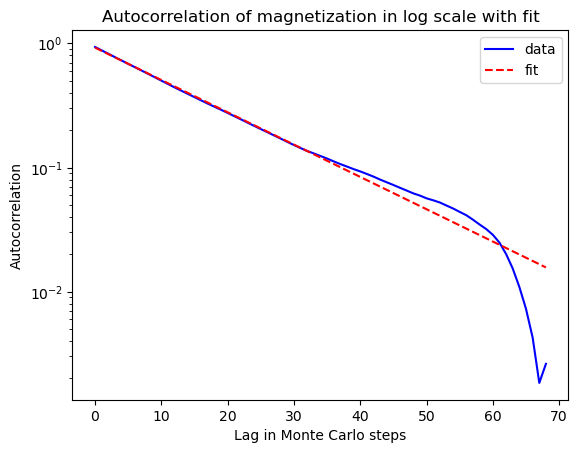

In [14]:
plt.plot(x, corr, 'b-', label='data')
plt.plot(x, exponential_decay(x, *params), 'r--', label='fit')
plt.yscale('log')
plt.xlabel("Lag in Monte Carlo steps")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of magnetization in log scale with fit")
plt.legend()
plt.savefig("plots/acf_mag_fit.pdf")

In [9]:
params

array([16.67184713,  0.92515705])

In [10]:
tau = 1/2
for i in x:
    tau += corr[i]
    if i >= 6 * tau:
        break
    else:
        continue

In [11]:
tau

16.22655563107154